[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1EpokQ8Y_5jIJ7HdixZms81Oqgh2sp7-E?usp=sharing)

## LlamaIndex Cognee GraphRAG Integration

Connecting external knowledge to the LLM efficiently and retrieving it  is a key challenge faced by developers. For developers and data scientists, integrating structured and unstructured data into AI workflows often involves multiple tools, complex pipelines, and time-consuming processes.

Enter **cognee,** a powerful framework for knowledge and memory management, and LlamaIndex, a versatile data integration library. Together, they enable us to transform  retrieval-augmented generation (RAG) pipelines, into GraphRAG pipelines, streamlining the path from raw data to actionable insights.

In this post, we’ll explore a demo that leverages cognee and LlamaIndex to create a knowledge graph from a LlamaIndex document, process it into a meaningful structure, and extract useful insights. By the end, you’ll see how these tools can give you new insights into your data by connecting various data sources in one big semantic layer you can analyze.

## RAG - Recap

RAG enhances LLMs by integrating external knowledge sources during inference. It does so by turning the data into a vector representation and storing it in a vector store.

### Key Benefits of RAG:

1. Connecting domain specific data to LLMs
2. Cost savings
3. Higher accuracy than base LLM

However, building a RAG system presents challenges: handling diverse data formats, data updates, creating a robust metadata layer, and mediocre accuracy

## Introducing cognee and LlamaIndex more

cognee simplifies knowledge and memory management for LLMs, while LlamaIndex facilitates connecting LLMs to structured data sources and enabling agentic  use-cases

cognee is inspired by human mind and higer cognitive functions. It mimics ways we construct our mental map of the world and build a semantic understanding of various objects, terms and issues in our everyday lives.

cognee brings this approach to code by allowing developers to create  semantic layers that would allow users to store their ontologies which are **a formalised depiction of knowledge** in graphs.

This lets you use the knowledge you have about a system connect it to LLMs in a modular way, with best data engineering practices, wide choice of vector and graph stores and various LLMs you can use.

Together, they:

- Turn unstructured and semi-structured data into a graph/vector representation.
- Enable ontology generation for particular domains, making unique graphs for every vertical
- Provide a deterministic layer for LLM outputs, ensuring consistency and reliability.

## Step-by-Step Demo: Building a RAG System with Cognee and LlamaIndex

### 1. Setting Up the Environment

Start by importing the required libraries and defining the environment:

In [ ]:
!pip install llama-index-graph-rag-cognee==0.1.2

In [ ]:
import os
import asyncio
from llama_index.core import Document
from llama_index.graph_rag.cognee import CogneeGraphRAG

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = ""

Ensure you’ve set up your API keys and installed necessary dependencies.

### 2. Preparing the Dataset

We’ll use a brief profile of an individual as our sample dataset:

In [ ]:
documents = [
    Document(
        text="Jessica Miller, Experienced Sales Manager with a strong track record in driving sales growth and building high-performing teams."
    ),
    Document(
        text="David Thompson, Creative Graphic Designer with over 8 years of experience in visual design and branding."
    ),
]

### 3. Initializing CogneeGraphRAG

Instantiate the Cognee framework with configurations for LLM, graph, and database providers:

In [ ]:
cogneeRAG = CogneeGraphRAG(
    llm_api_key=os.environ["OPENAI_API_KEY"],
    llm_provider="openai",
    llm_model="gpt-4o-mini",
    graph_db_provider="networkx",
    vector_db_provider="lancedb",
    relational_db_provider="sqlite",
    relational_db_name="cognee_db",
)

### 4. Adding Data to Cognee

Load the dataset into the cognee framework:

In [ ]:
await cogneeRAG.add(documents, "test")

This step prepares the data for graph-based processing.

### 5. Processing Data into a Knowledge Graph

Transform the data into a structured knowledge graph:

In [ ]:
await cogneeRAG.process_data("test")

The graph now contains nodes and relationships derived from the dataset, creating a powerful structure for exploration.

### 6. Performing Searches

### Answer prompt based on knowledge graph approach:

In [ ]:
search_results = await cogneeRAG.search(
    "Tell me who are the people mentioned?"
)

print("\n\nAnswer based on knowledge graph:\n")
for result in search_results:
    print(f"{result}\n")

### Answer prompt based on RAG approach:

In [ ]:
search_results = await cogneeRAG.rag_search(
    "Tell me who are the people mentioned?"
)

print("\n\nAnswer based on RAG:\n")
for result in search_results:
    print(f"{result}\n")

In conclusion, the results demonstrate a significant advantage of the knowledge graph-based approach (Graphrag) over the RAG approach. Graphrag successfully identified all the mentioned individuals across multiple documents, showcasing its ability to aggregate and infer information from a global context. In contrast, the RAG approach was limited to identifying individuals within a single document due to its chunking-based processing constraints. This highlights Graphrag's superior capability in comprehensively resolving queries that span across a broader corpus of interconnected data.

### 7. Finding Related Nodes

Explore relationships in the knowledge graph:

In [ ]:
related_nodes = await cogneeRAG.get_related_nodes("person")

print("\n\nRelated nodes are:\n")
for node in related_nodes:
    print(f"{node}\n")

## Why Choose Cognee and LlamaIndex?

### 1. Agentic Framework and Memory tied together

Your agents can now get long-term, short-term memory and memory specific to their domains

### 2. Enhanced Querying and Insights

Your memory can now automatically optimize itself and allow to respond to questions better

### 3. Simplified Deployment

You can use the standard tools out of the box and get things done without much effort

## Visualizing the Knowledge Graph

Imagine a graph structure where each node represents a document or entity, and edges indicate relationships.

Here’s the visualized knowledge graph from the simple example above:

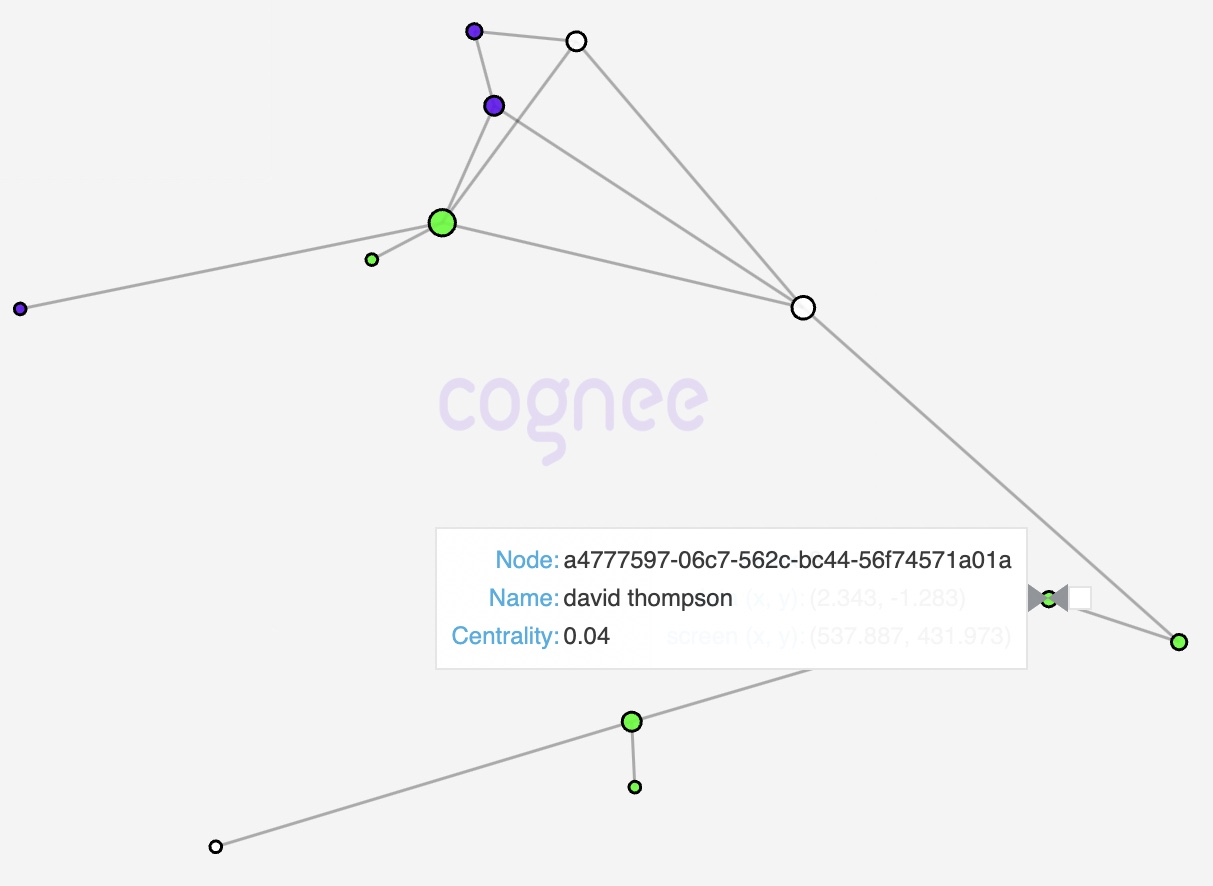


## Conclusion

Try running it yourself

[join the cognee community](https://discord.gg/tV7pr5XSj7)